<a href="https://colab.research.google.com/github/ArkaBhowmik-666-Lucifer/Final-Year-Project/blob/main/Database_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import pandas as pd # data analysis
import numpy as np # linear algebra
#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/4th_Year_Grp_Project/Crop Recommendation West Bengal.xlsx")

In [ ]:
df.head()

,Temperature,Humidity,pH,Rainfall,Label
0,20.879744,82.002744,6.502985,202.935536,Rice
1,21.770462,80.319644,7.038096,226.655537,Rice
2,23.004459,82.320763,7.840207,263.964248,Rice
3,26.491096,80.158363,6.980401,242.864034,Rice
4,20.130175,81.604873,7.628473,262.717340,Rice


In [ ]:
df.tail()

,Temperature,Humidity,pH,Rainfall,Label
6995,19.194357,35.963156,6.425478,762.042570,Mustard
6996,23.493703,31.379660,6.134113,765.190596,Mustard
6997,18.190361,42.783204,6.872391,904.892120,Mustard
6998,23.148364,41.001895,6.185536,731.770490,Mustard
6999,24.180054,42.368177,6.473565,906.173454,Mustard


In [ ]:
df.shape

(7000, 5)

In [ ]:
df.nunique()

Temperature    6999
Humidity       6999
pH             6995
Rainfall       7000
Label            70
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  7000 non-null   float64
 1   Humidity     7000 non-null   float64
 2   pH           7000 non-null   float64
 3   Rainfall     7000 non-null   float64
 4   Label        7000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 273.6+ KB


In [ ]:
df.describe()

,Temperature,Humidity,pH,Rainfall
count,7000.000000,7000.000000,7000.000000,7000.000000
mean,23.493807,71.318934,6.454138,751.476229
std,6.755644,22.289074,0.667650,825.472175
min,6.105382,6.029440,3.504752,20.211267
25%,18.948438,58.055782,6.049754,123.595859
50%,23.344269,77.238068,6.406537,644.904867
75%,27.686253,90.259315,6.859321,1051.049795
max,46.791488,99.981876,9.935091,5989.995521


In [ ]:
df.columns

Index(['Temperature', 'Humidity', 'pH', 'Rainfall', 'Label'], dtype='object')

In [ ]:
df['Label'].unique()


array(['Rice', 'Maize', 'Banana', 'Jute', 'Pulses', 'Mango', 'Papaya',
       'Tea', 'Aleovera', 'Arecanut', 'Ashwagandha', 'Rose', 'Blackgram',
       'Chickpea', 'Coconut', 'Coffee', 'Cotton', 'Grapes', 'Kidneybeans',
       'Mothbeans', 'Mungbeans', 'Muskmelon', 'Orange', 'Piegonpeas',
       'Pomegranate', 'Watermelon', 'Apple', 'Cabbagge', 'Cauliflower',
       'Green Chillies', 'Carrot', 'Ginger', 'Garlic', 'Onion', 'Brinjal',
       'Button Mushrooms', 'Potato', 'Capsicum', 'Tomato',
       "Lady's Finger", 'DragonFruit', 'Olive', 'Marigold', 'Beetroot',
       'Lettuce', 'Corn', 'Green Peas', 'Cucumber', 'Guava', 'Turmeric',
       'Rajma', 'Pumpkin', 'Litchi', 'Broccoli', 'Spinach', 'Groundnut',
       'Jackfruit', 'Radish', 'Chinese Cabbage', 'Drumstick', 'Soybean',
       'Sweet Potato', 'Poppy Seeds', 'Coriander', 'Walnuts',
       'Cashewnuts', 'French Beans', 'Sugarcane', 'Bajra', 'Mustard'],
      dtype=object)

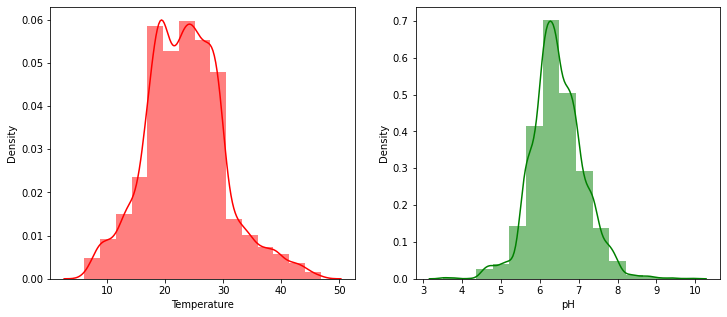

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['Temperature'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(df['pH'],color="green",bins=15,hist_kws={'alpha':0.5})
plt.savefig('Distplot.png')

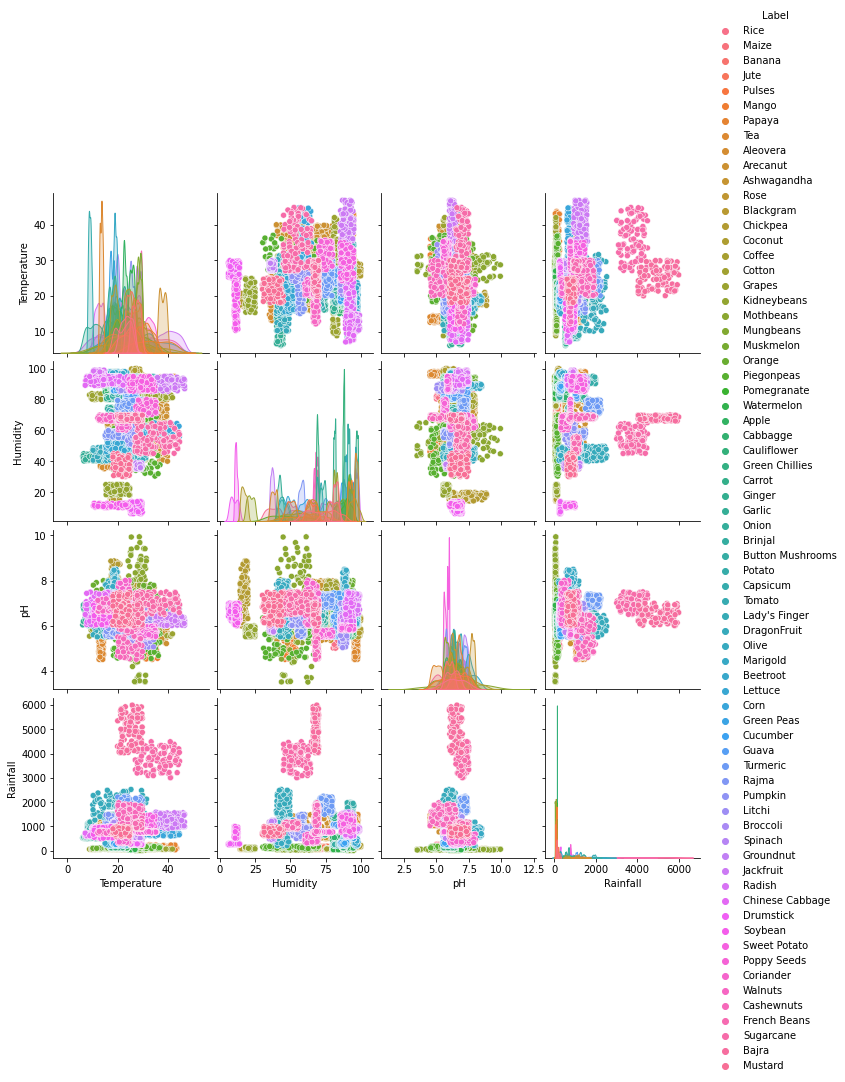

In [ ]:
sns.pairplot(df,hue = 'Label')
plt.savefig('Pairplot.png')

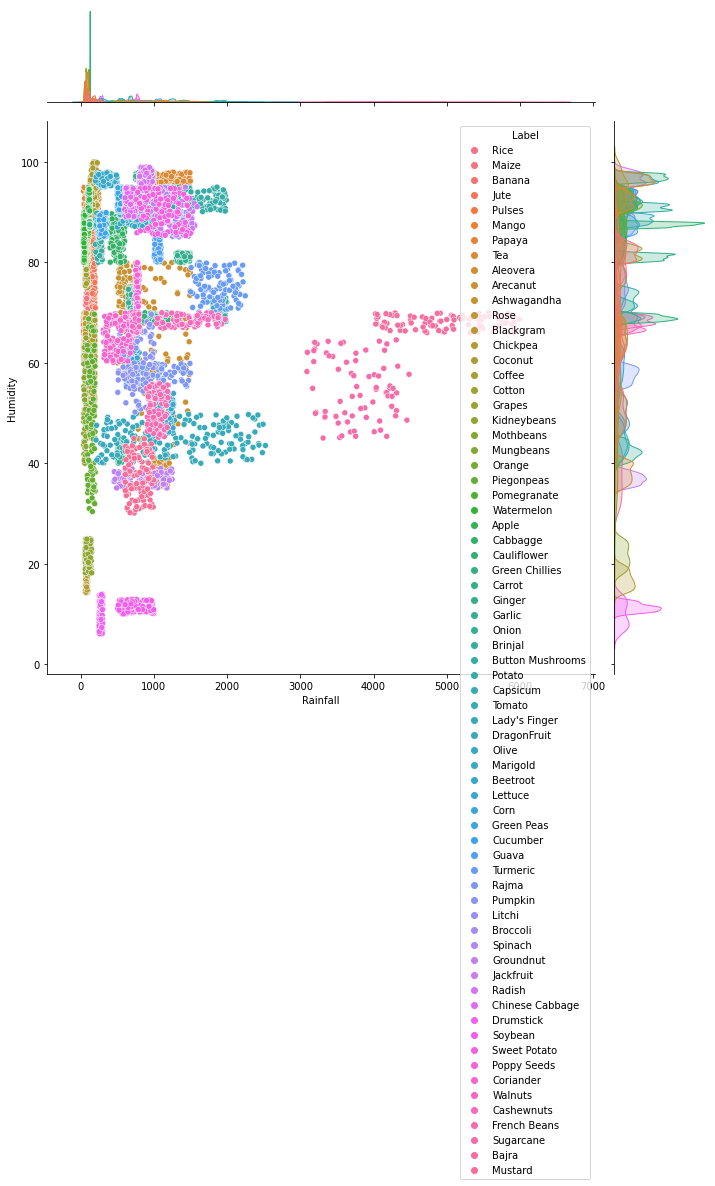

In [ ]:
sns.jointplot(x="Rainfall",y="Humidity",data=df[(df['Temperature']<40) & 
                                                  (df['Rainfall']>40)],height=10,hue="Label")
plt.savefig('Joinplot.png')

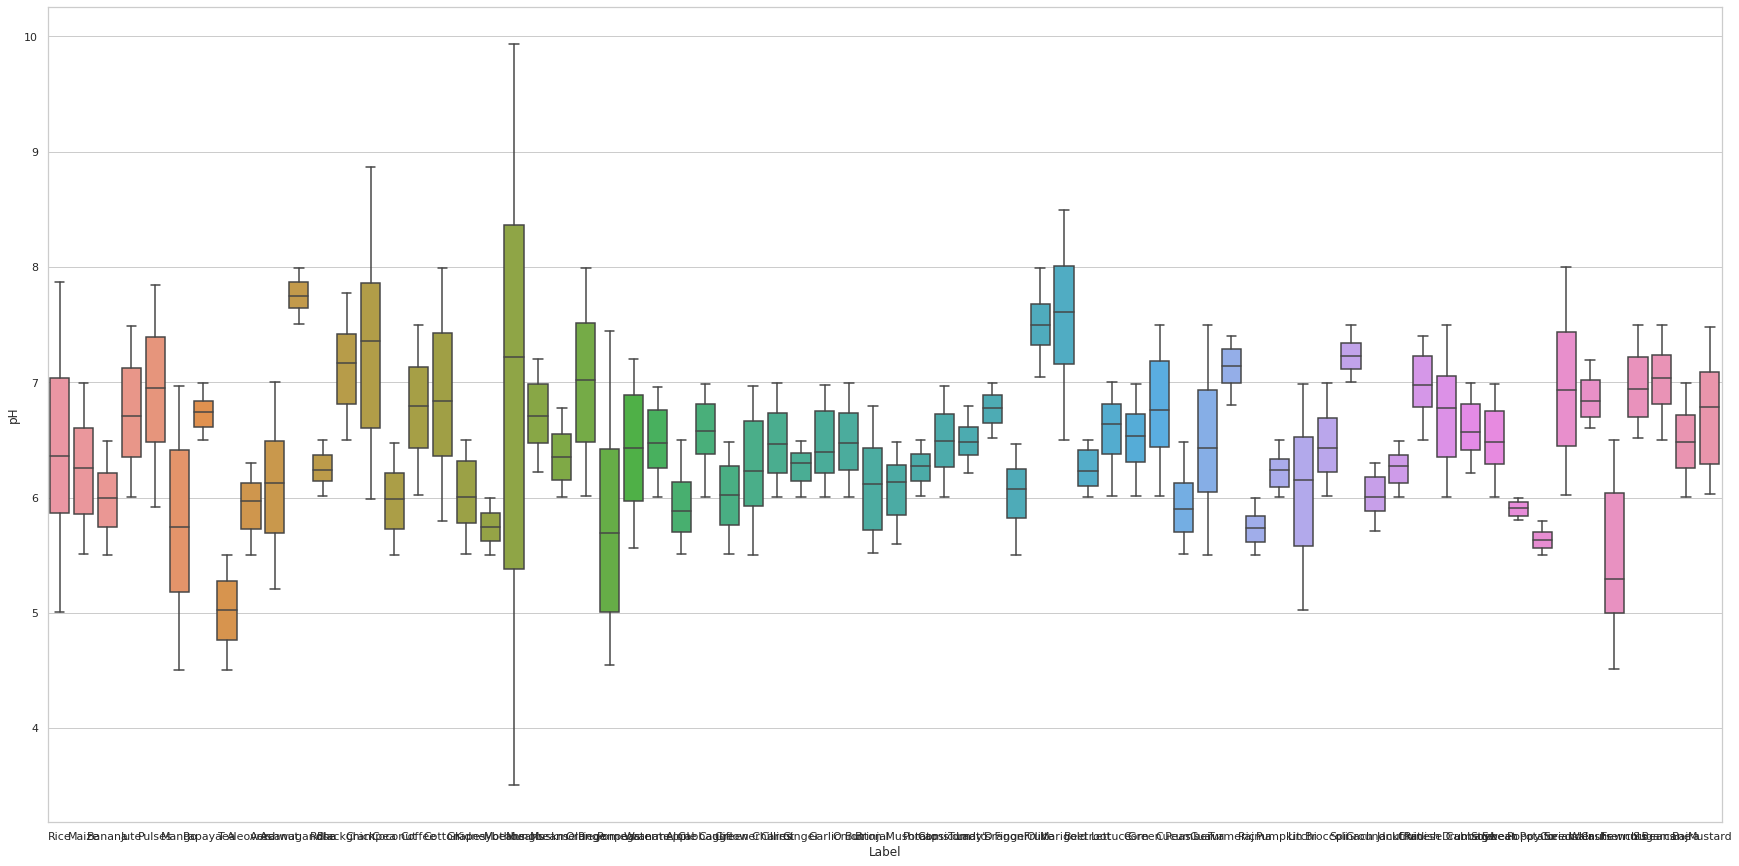

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='Label',y='pH',data=df)
plt.savefig('Boxplot.png')

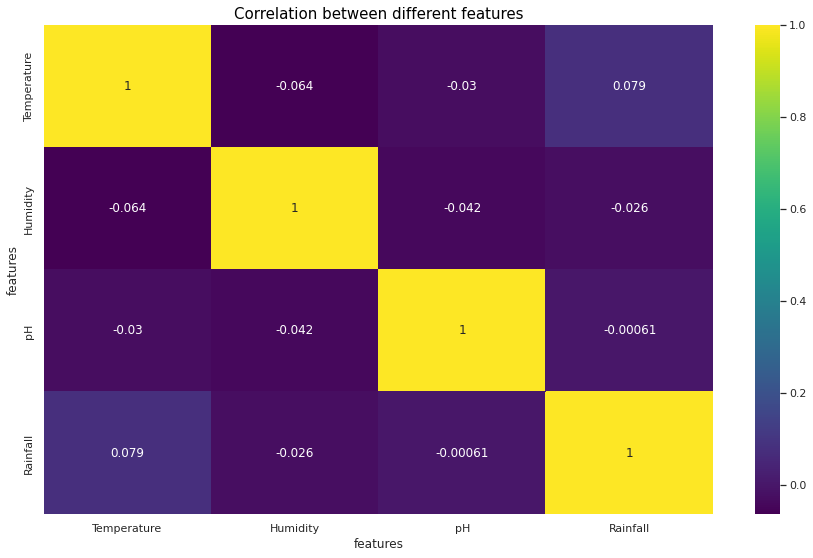

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [ ]:
crop_summary = pd.pivot_table(df,index=['Label'],aggfunc='mean')
crop_summary.head()

,Humidity,Rainfall,Temperature,pH
Label,,,,
Aleovera,38.141856,1101.351414,20.071347,5.938439
Apple,92.333383,112.654779,22.630942,5.929663
Arecanut,60.971394,1105.045265,37.951887,6.102934
Ashwagandha,70.381177,617.437762,27.570690,7.751084
Bajra,68.115066,5030.548004,25.168579,6.495240


In [ ]:
features = df[['Temperature', 'Humidity', 'pH', 'Rainfall']]
target = df['Label']
acc = []
model = []
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.76
                  precision    recall  f1-score   support

        Aleovera       0.88      0.92      0.90        24
           Apple       0.62      1.00      0.77        25
        Arecanut       0.69      0.55      0.61        20
     Ashwagandha       0.52      0.79      0.63        14
           Bajra       1.00      0.70      0.82        23
          Banana       0.92      0.96      0.94        24
        Beetroot       1.00      0.81      0.89        21
       Blackgram       0.93      1.00      0.97        28
         Brinjal       0.35      0.39      0.37        23
        Broccoli       0.86      1.00      0.92        24
Button Mushrooms       0.50      0.54      0.52        24
        Cabbagge       0.95      0.83      0.88        23
        Capsicum       0.62      0.62      0.62        16
          Carrot       0.55      0.86      0.67        14
      Cashewnuts       0.35      0.29      0.32        21
     Cauliflower       1.00      1.00      1.00 

In [ ]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.74642857 0.75285714 0.74928571 0.76357143 0.75857143]


In [ ]:
#Print Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

knn_train_accuracy =  0.8532142857142857
knn_test_accuracy =  0.76


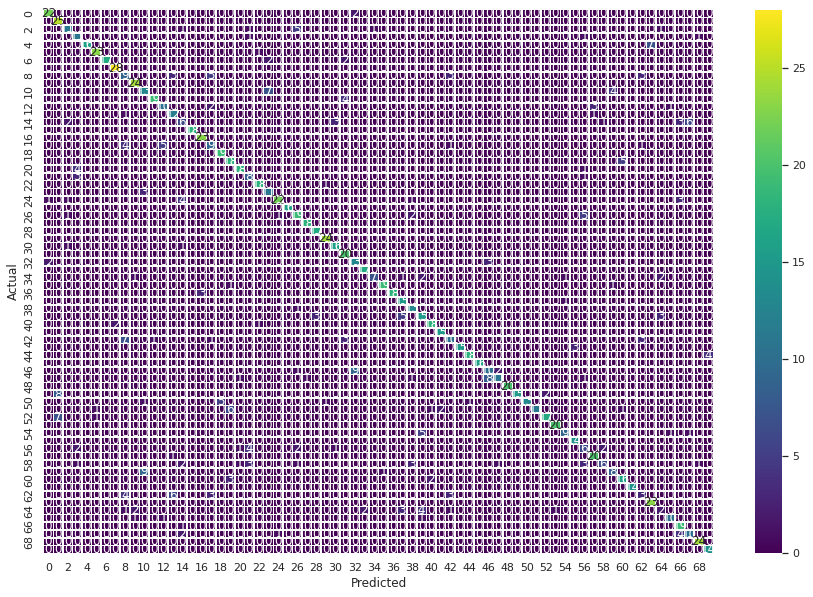

In [ ]:
y_pred = knn.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('KNN-Predicted vs actual.png')
plt.show()

In [ ]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.82071429, 0.78642857, 0.80071429, 0.78      , 0.76      ,
       0.74142857, 0.73571429, 0.73214286, 0.71714286, 0.70642857,
       0.70214286, 0.68928571, 0.68285714, 0.67785714, 0.66928571,
       0.65785714, 0.65571429, 0.64571429, 0.64785714, 0.63857143])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [12,13,14,15,16,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [ ]:
g_res.best_score_

0.7653557883650007

In [ ]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

In [ ]:
# Using the best hyperparameters
knn_1 = KNeighborsClassifier(n_neighbors =3, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn_1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=3,
                     weights='distance')

In [ ]:
knn_train_accuracy = knn_1.score(x_train,y_train)
print("knn_train_accuracy = ",knn_1.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn_1.score(x_test,y_test)
print("knn_test_accuracy = ",knn_1.score(x_test,y_test))

knn_train_accuracy =  1.0
knn_test_accuracy =  0.8435714285714285


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.965
                  precision    recall  f1-score   support

        Aleovera       1.00      1.00      1.00        24
           Apple       0.92      0.96      0.94        25
        Arecanut       0.95      0.95      0.95        20
     Ashwagandha       0.93      1.00      0.97        14
           Bajra       1.00      1.00      1.00        23
          Banana       1.00      1.00      1.00        24
        Beetroot       1.00      1.00      1.00        21
       Blackgram       1.00      1.00      1.00        28
         Brinjal       0.88      1.00      0.94        23
        Broccoli       1.00      1.00      1.00        24
Button Mushrooms       0.75      0.88      0.81        24
        Cabbagge       0.96      1.00      0.98        23
        Capsicum       0.84      1.00      0.91        16
          Carrot       1.00      1.00      1.00        14
      Cashewnuts       1.00      0.95      0.98        21
     Cauliflower       1.00      1.00

In [ ]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.96357143 0.96357143 0.96214286 0.955      0.95571429]


In [ ]:
#Print Train Accuracy
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Training accuracy =  0.9996428571428572
Testing accuracy =  0.965


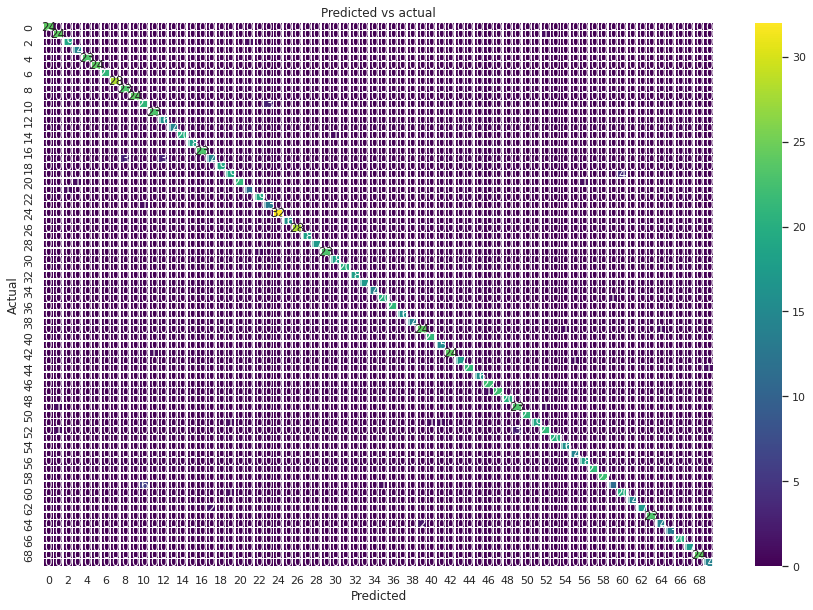

In [ ]:
y_pred = RF.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.savefig('RF-predicted vs actual.png')
plt.show()

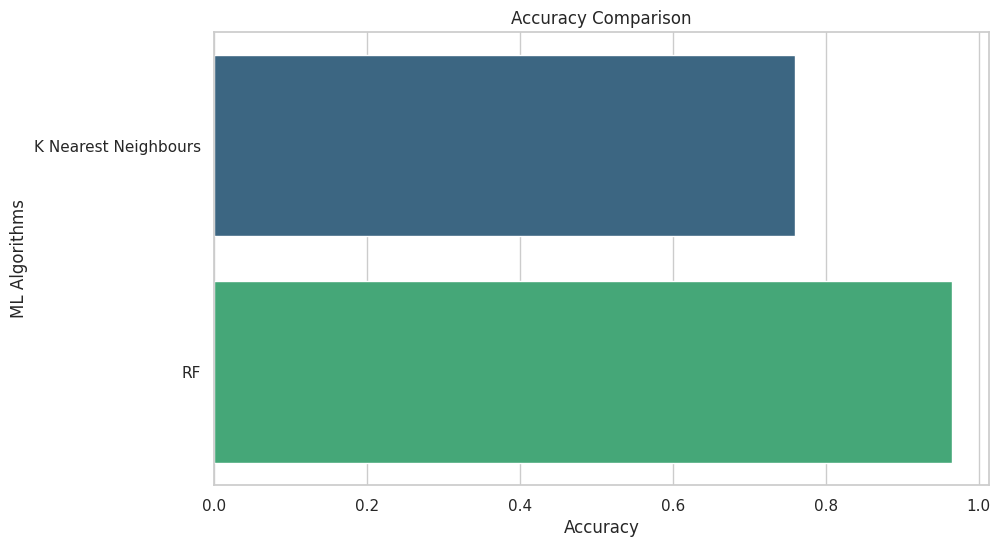

In [ ]:
plt.figure(figsize=[10,6],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('KNN vs RF plot.png', dpi=300, bbox_inches='tight')

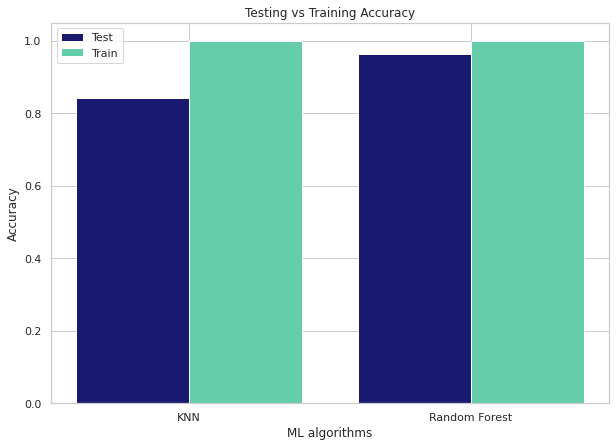

In [ ]:
label = ['KNN','Random Forest']
Test = [knn_test_accuracy,rf_test_accuracy]
Train = [knn_train_accuracy,rf_train_accuracy]

f, ax = plt.subplots(figsize=(10,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
plt.savefig('train vs test.png')
plt.show()